In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols=['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

In [3]:
#loading the CSV File
df=pd.read_csv('machine.csv',names=cols,index_col=None)
df.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
df.dtypes

vendor name    object
Model Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

In [5]:
df.isnull().sum()

vendor name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [6]:
df.shape

(209, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D00C7806C8>,
      dtype=object)

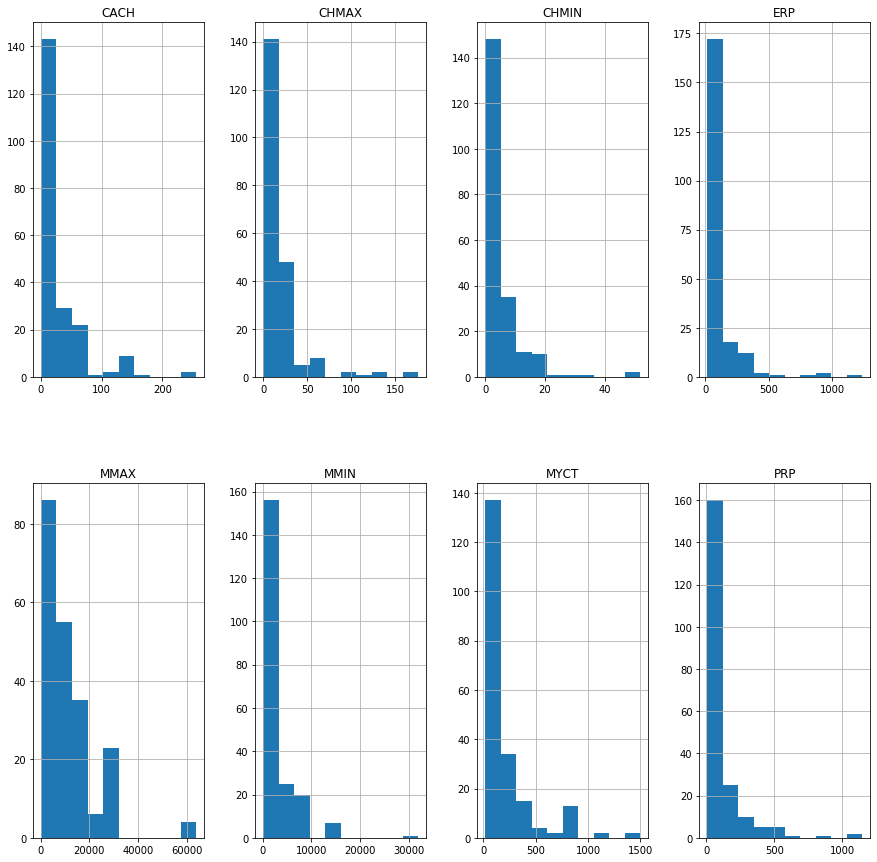

In [7]:
df.hist(figsize=(15,15),grid=True,layout=(2,4))

In [8]:
#checking for the skewness
df.skew()

MYCT     2.544153
MMIN     3.515933
MMAX     2.140663
CACH     2.824777
CHMIN    4.027333
CHMAX    3.595905
PRP      3.892814
ERP      4.304024
dtype: float64

In [9]:
#Removing the skewness from the attributes
df['CACH']=np.cbrt(df['CACH'])
df['MYCT']=np.cbrt(df['MYCT'])
df['MMIN']=np.cbrt(df['MMIN'])
df['MMAX']=np.cbrt(df['MMAX'])
df['CHMIN']=np.cbrt(df['CHMIN'])
df['CHMAX']=np.cbrt(df['CHMAX'])
df['PRP']=np.cbrt(df['PRP'])
df['ERP']=np.cbrt(df['ERP'])


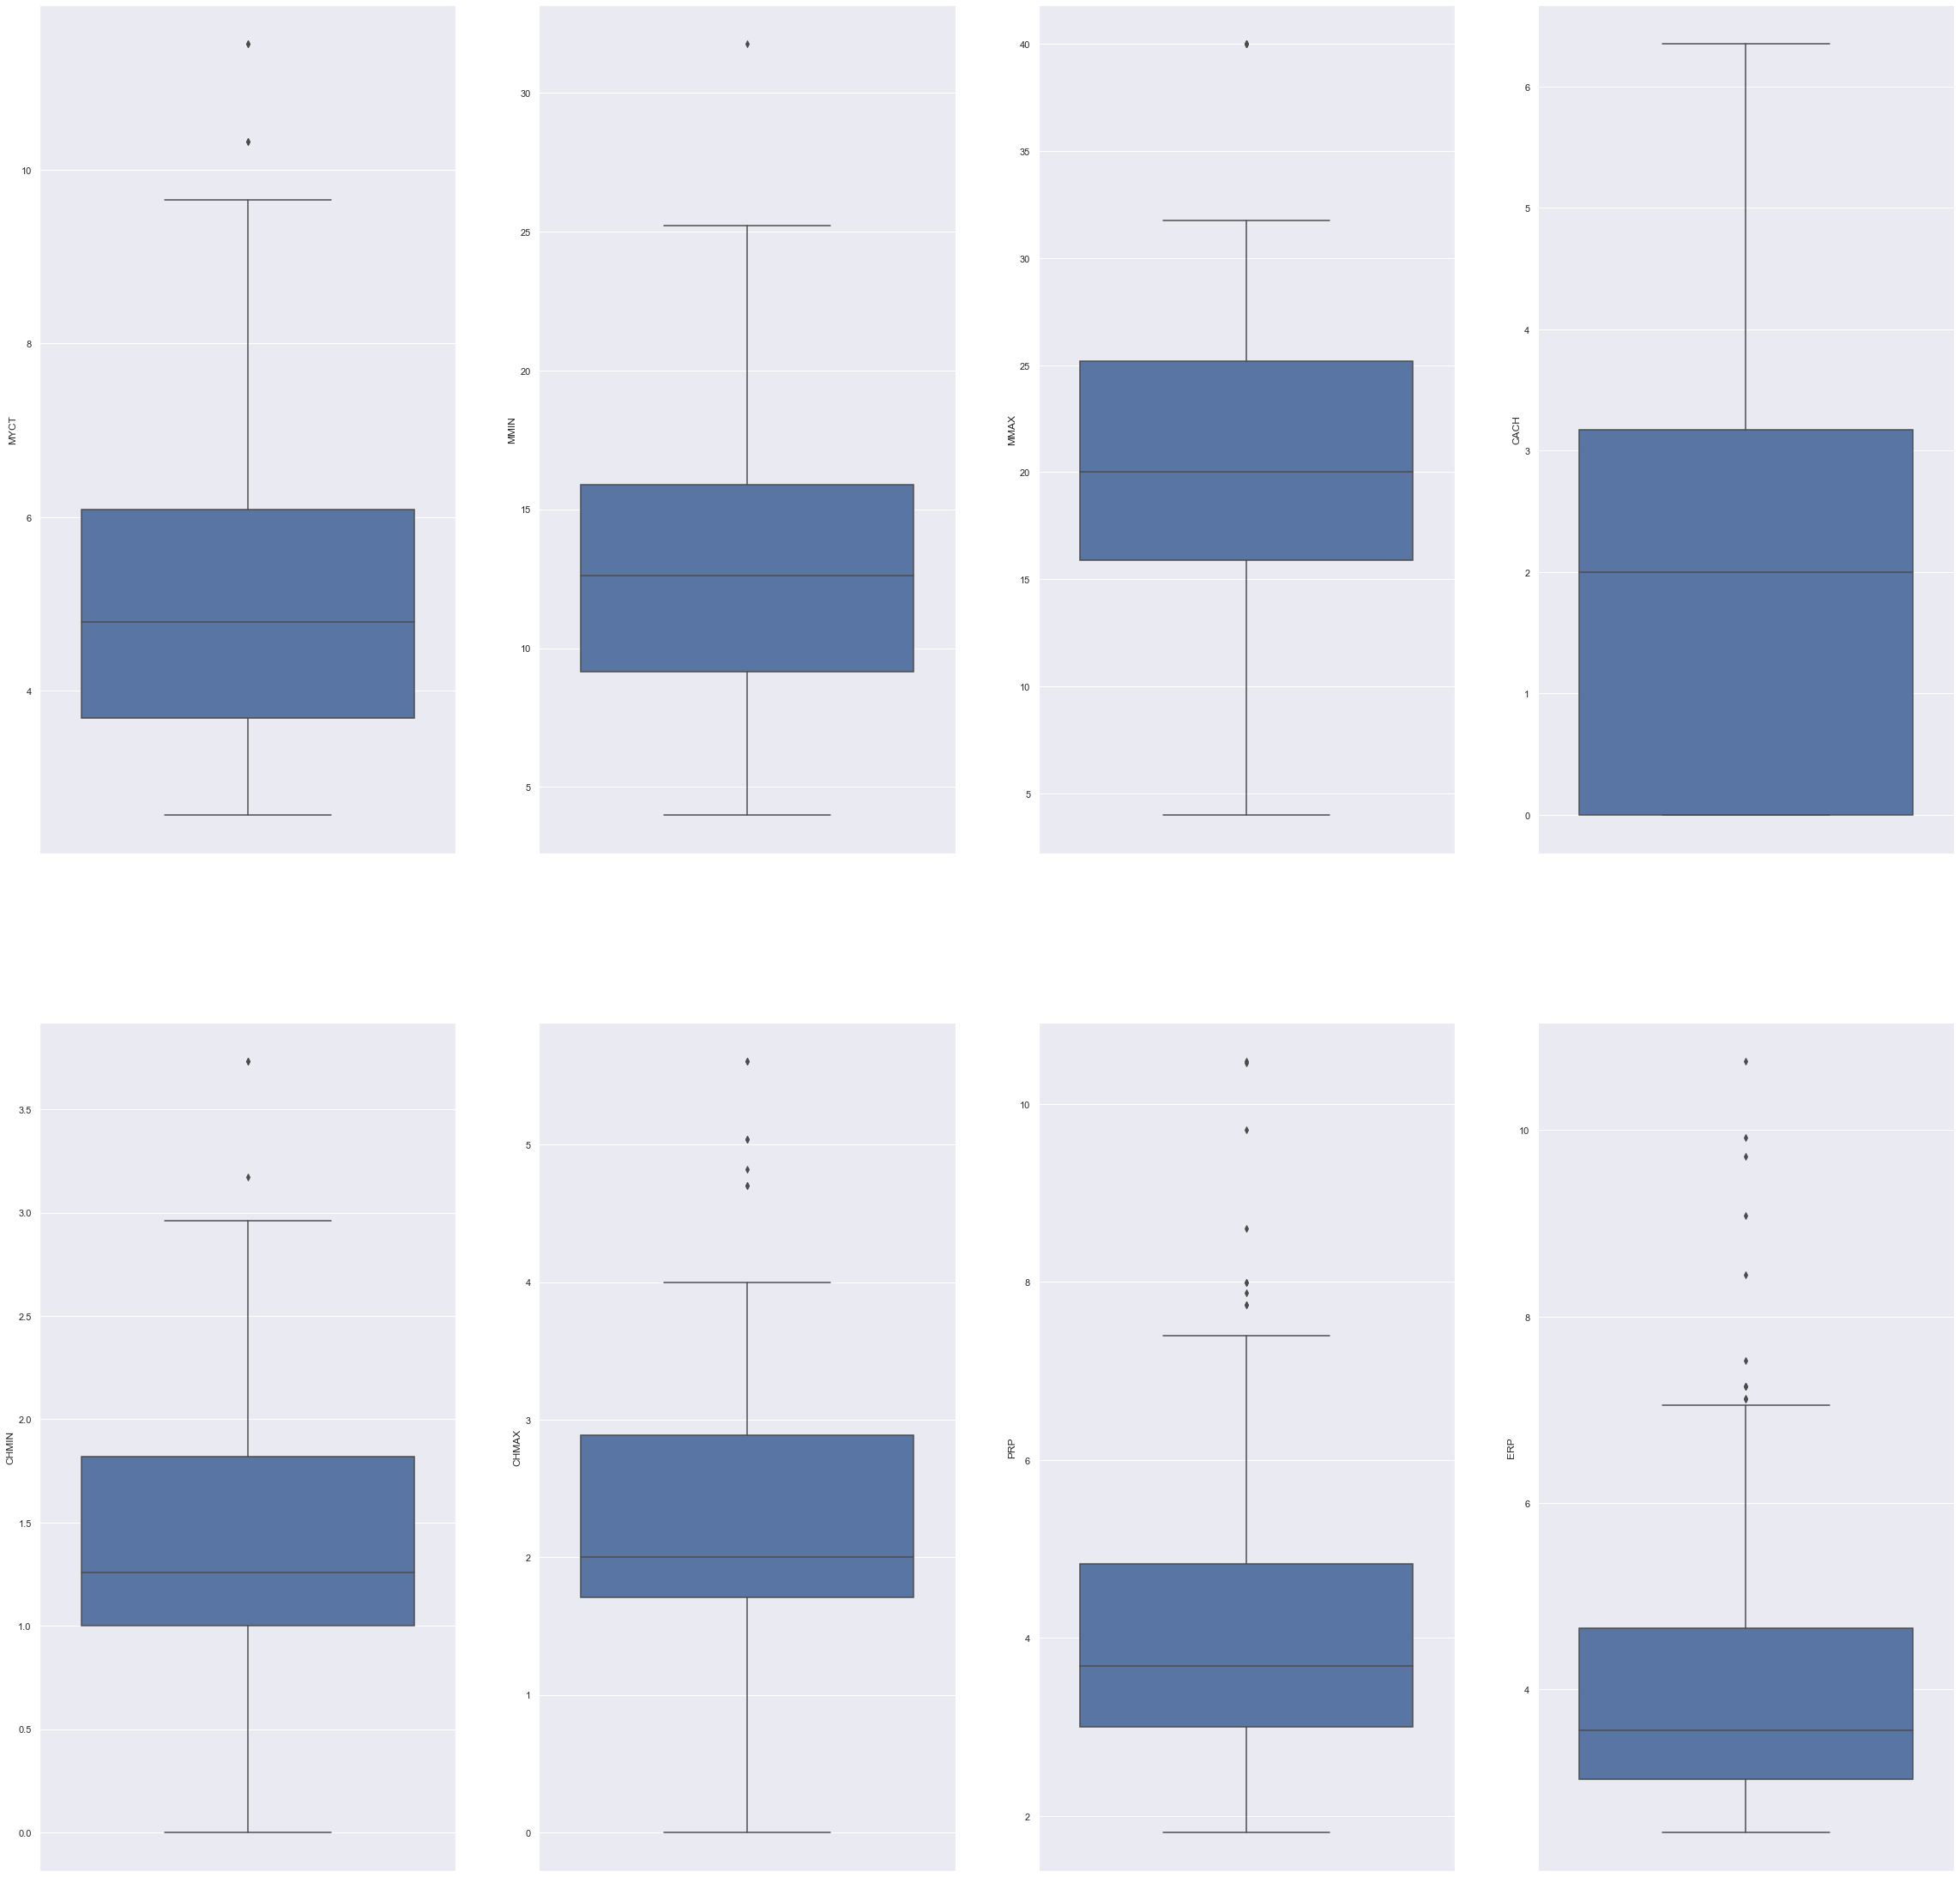

In [10]:
#Analysing the outliers using the box plot
sns.set(font_scale=1.0)
fig,axes=plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(40,40)
sns.boxplot(x='MYCT',orient='v',ax=axes[0][0],data=df)
sns.boxplot(x='MMIN',orient='v',ax=axes[0][1],data=df)
sns.boxplot(x='MMAX',orient='v',ax=axes[0][2],data=df)
sns.boxplot(x='CACH',orient='v',ax=axes[0][3],data=df)
sns.boxplot(x='CHMIN',orient='v',ax=axes[1][0],data=df)
sns.boxplot(x='CHMAX',orient='v',ax=axes[1][1],data=df)
sns.boxplot(x='PRP',orient='v',ax=axes[1][2],data=df)
sns.boxplot(x='ERP',orient='v',ax=axes[1][3],data=df)
plt.show()

In [11]:
#Dropping the vendor name as it is not required and will not affect the target variable
df=df.drop(['vendor name'],axis=1)

In [12]:
#clasifying the model name attribute using the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Model Name']=le.fit_transform(df['Model Name'])

In [13]:
#Removing te outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]


In [14]:
df.shape

(201, 9)

(0, 100)

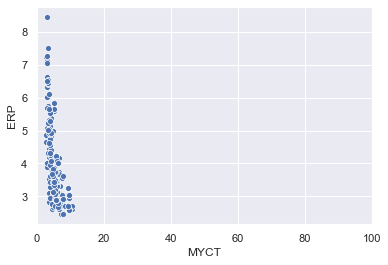

In [15]:
sns.scatterplot(x='MYCT',y='ERP',data=df)
plt.xlim(0,100)

In [16]:
#As we found that the ERP is decreasind with the increase in Machone cycle Time

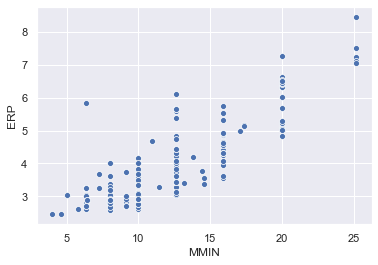

In [17]:
sns.scatterplot(x='MMIN',y='ERP',data=df)


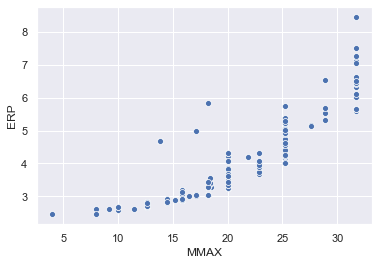

In [18]:
sns.scatterplot(x='MMAX',y='ERP',data=df)

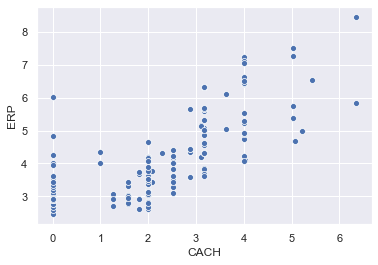

In [19]:
sns.scatterplot(x='CACH',y='ERP',data=df)

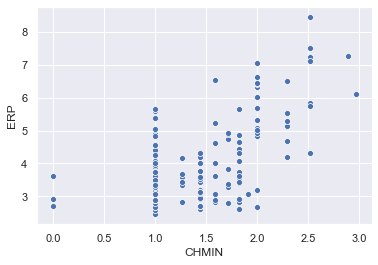

In [20]:
sns.scatterplot(x='CHMIN',y='ERP',data=df)

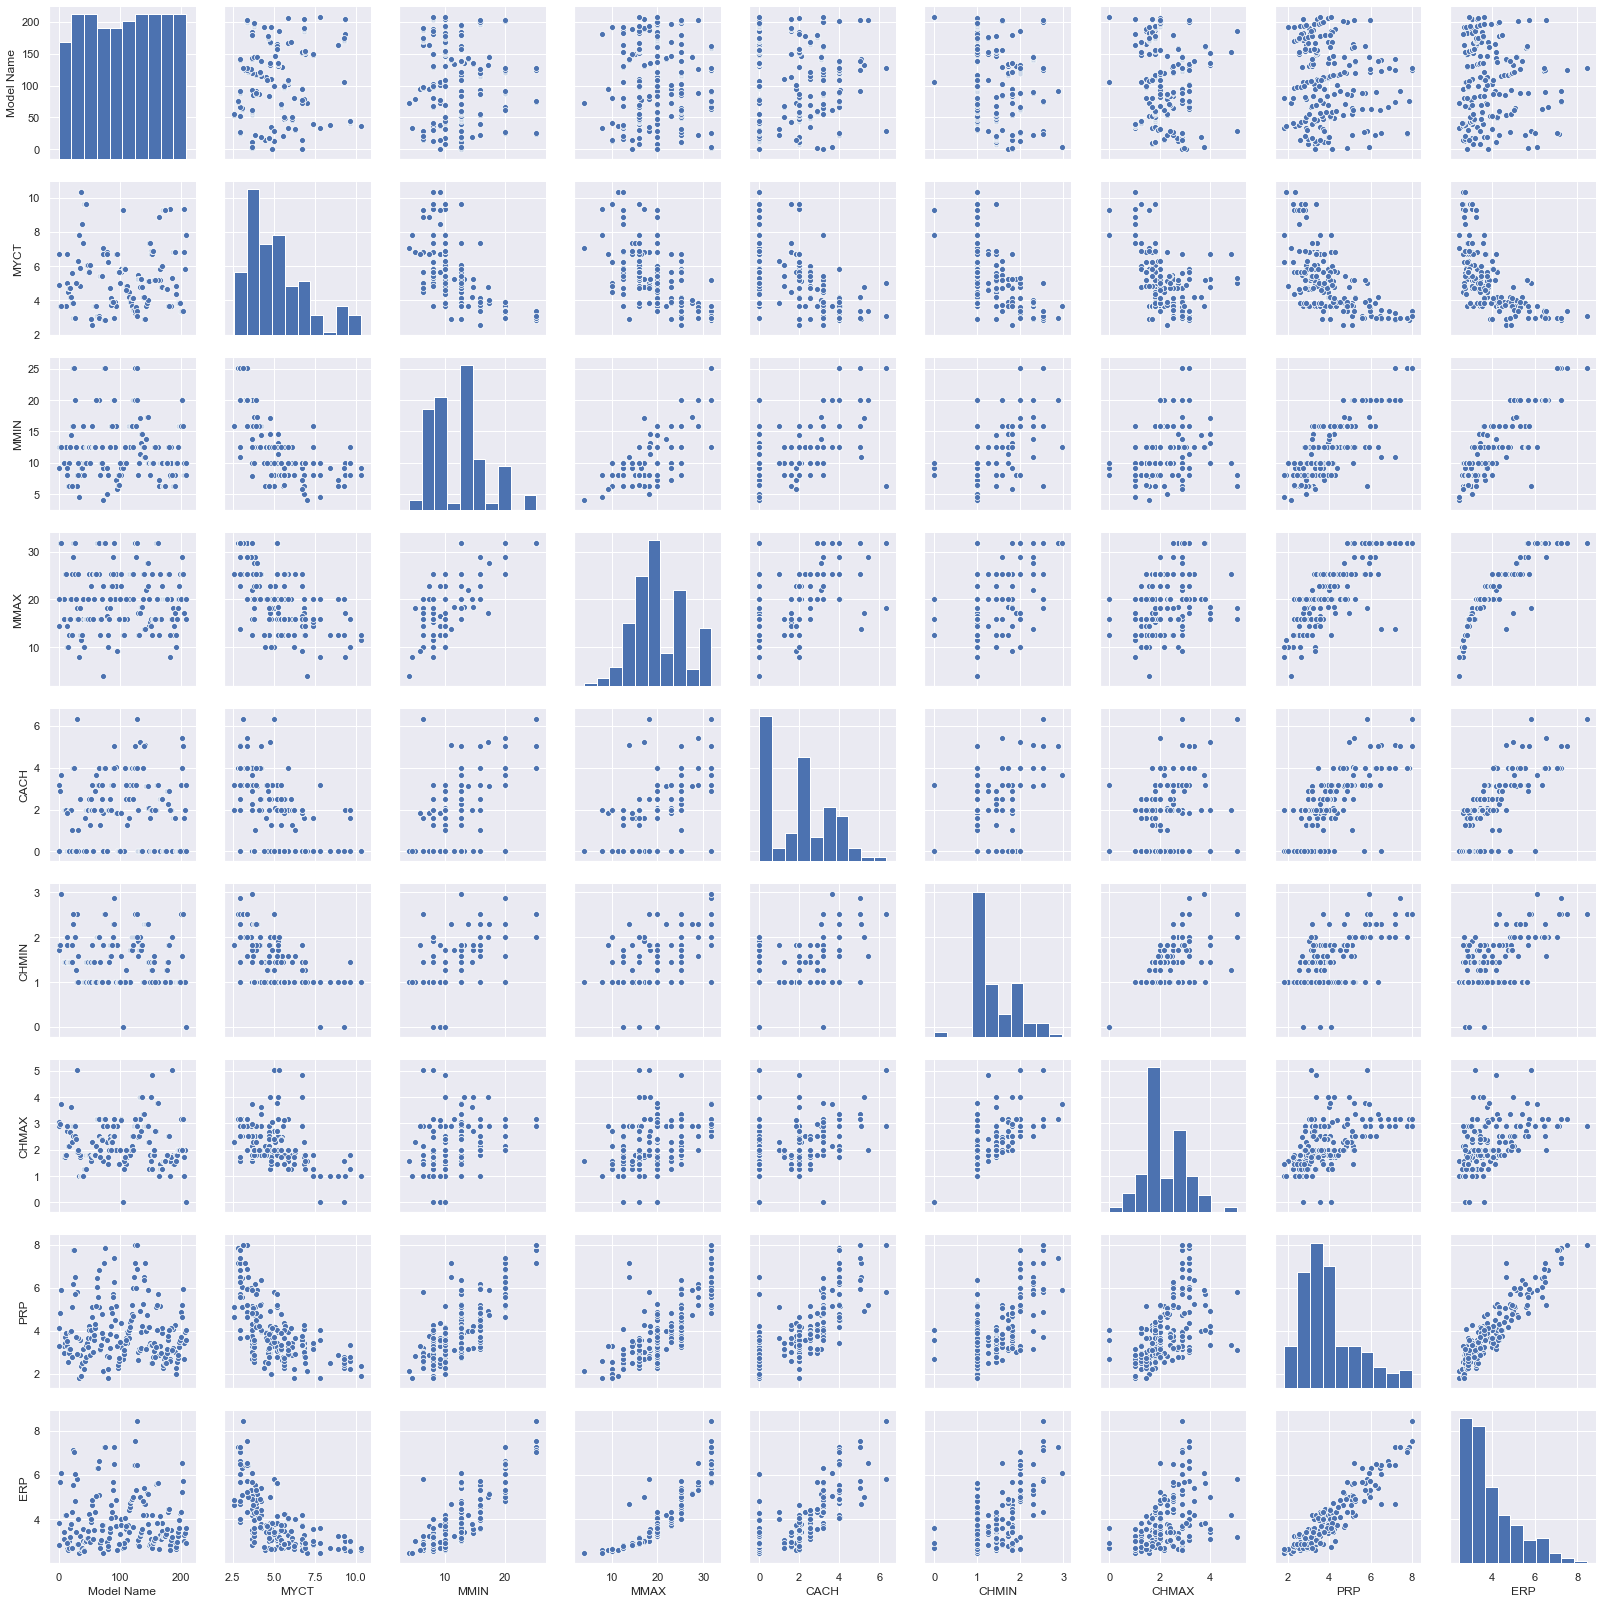

In [21]:
sns.pairplot(df)

In [22]:
df['Model Name'].value_counts()

208    1
66     1
78     1
75     1
74     1
      ..
138    1
137    1
136    1
135    1
0      1
Name: Model Name, Length: 201, dtype: int64

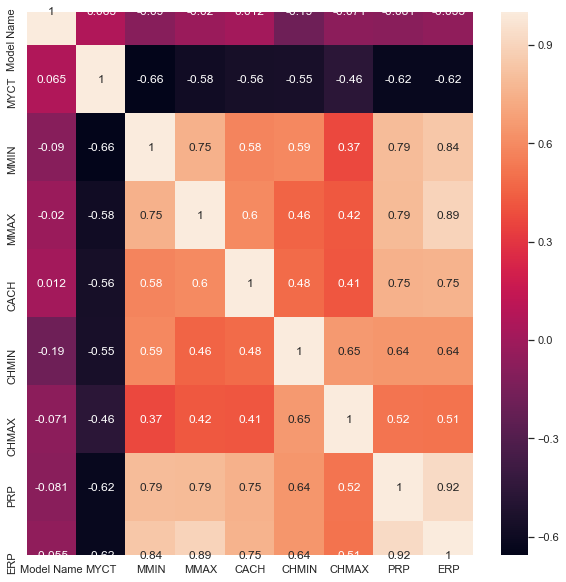

In [23]:
hmap=df.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(hmap,annot=True)

In [24]:
df.head()

,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,5.000000,6.349604,18.171206,6.349604,2.519842,5.039684,5.828477,5.838272
1,62,3.072317,20.000000,31.748021,3.174802,2.000000,3.174802,6.455315,6.324704
2,63,3.072317,20.000000,31.748021,3.174802,2.000000,3.174802,6.036811,6.324704
3,64,3.072317,20.000000,31.748021,3.174802,2.000000,3.174802,5.561298,6.324704
4,65,3.072317,20.000000,25.198421,3.174802,2.000000,2.519842,5.091643,5.091643


In [25]:
#Using StandardScaler for regularization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)

In [26]:
df=pd.DataFrame(data=df)

In [27]:
y=df.iloc[:,8:9]
y.head()

,8
0,1.571850
1,1.972285
2,1.972285
3,1.972285
4,0.957217


In [28]:
x=df.iloc[:,0:8]
x.head()

,0,1,2,3,4,5,6,7
0,-1.291044,-0.094882,-1.321989,-0.347080,2.753710,2.135720,3.407580,1.371020
1,-0.739450,-1.151557,1.751671,1.881523,0.786151,1.138409,1.157737,1.833300
2,-0.722735,-1.151557,1.751671,1.881523,0.786151,1.138409,1.157737,1.524662
3,-0.706020,-1.151557,1.751671,1.881523,0.786151,1.138409,1.157737,1.173981
4,-0.689305,-1.151557,1.751671,0.806421,0.786151,1.138409,0.367577,0.827621


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 8)
(61, 8)
(140, 1)
(61, 1)


In [30]:
from sklearn.metrics import r2_score
max_rscore=0
for r_state in range(42,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=r=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2_score corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state
print()
print("max R2 score corresponding to r_state is",final_r_state,"is:",max_rscore)


R2_score corresponding to random state: 42 is: 0.9498040278277239
R2_score corresponding to random state: 43 is: 0.9420577816429463
R2_score corresponding to random state: 44 is: 0.938206915087177
R2_score corresponding to random state: 45 is: 0.913560943882406
R2_score corresponding to random state: 46 is: 0.9332791904753654
R2_score corresponding to random state: 47 is: 0.9432690790142209
R2_score corresponding to random state: 48 is: 0.9401706899503747
R2_score corresponding to random state: 49 is: 0.9639682872328249
R2_score corresponding to random state: 50 is: 0.9305668570102128
R2_score corresponding to random state: 51 is: 0.9578207600269943
R2_score corresponding to random state: 52 is: 0.9386708326559199
R2_score corresponding to random state: 53 is: 0.9553191292033696
R2_score corresponding to random state: 54 is: 0.9200323989594386
R2_score corresponding to random state: 55 is: 0.9408706459184052
R2_score corresponding to random state: 56 is: 0.9263662784888117
R2_score cor

In [31]:
from sklearn.svm import SVR
model=SVR(kernel='linear')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 20 ,100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(model, param_grid, cv=8,scoring='neg_mean_squared_error')

In [32]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [33]:
grid_search.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
model=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model.fit(x_train,y_train)

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
      

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9450270526105541
The r2 Score is: 0.9450270526105541
The score is: 0.9556971522409186
The r2 Score is: 0.9556971522409186


In [35]:
#Using Lasso Regression
from sklearn.linear_model import Lasso
Lassoreg=Lasso()
alphas = [0.001, 0.01, 0.05, 0.1, 1, 10, 20 ,100]
param_grid1 = {'alpha': alphas}
grid_search1 = GridSearchCV(Lassoreg, param_grid1, cv=8,scoring='neg_mean_squared_error')

In [36]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1, 10, 20, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [37]:
grid_search1.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
Lassoreg=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lassoreg.fit(x_train,y_train)

def evaluate(x, y, dataset):
    pred = Lassoreg.predict(x)
    score = Lassoreg.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
      

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.947744409657337
The r2 Score is: 0.947744409657337
The score is: 0.9540122418186161
The r2 Score is: 0.9540122418186161


In [39]:
cross_val_score(lr,x,y,cv=5)

array([0.9273591 , 0.83685064, 0.9591271 , 0.9372849 , 0.94384094])

In [40]:
cross_val_score(model,x,y,cv=5)

array([0.92036041, 0.85263878, 0.95620036, 0.94535224, 0.94532718])

In [41]:
cross_val_score(Lassoreg,x,y,cv=5)

array([0.92765122, 0.83840817, 0.9589425 , 0.93814454, 0.94386265])

In [42]:
#SVR Algorithm is giving the best results .Hence considering the above model

In [43]:
from sklearn.externals import joblib
joblib.dump(model,'Computer-hardware_regression.pkl')

['Computer-hardware_regression.pkl']